In [64]:
import pandas
import numpy
import matplotlib.pylab
import seaborn
import pymysql
from sklearn.datasets import load_diabetes
matplotlib.pyplot.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签

### 1、柱状图绘制

In [4]:
conn = pymysql.connect("127.0.0.1","root","root","pythontestdb")
book_data = pandas.read_sql("select * from taob",con=conn)

In [5]:
book_data.head()

,title,link,price,comment
0,买2袋减2元 印尼进口菲那菲娜虾味木薯片油炸大龙虾片零食品400g,https://item.taobao.com/item.htm?id=44350560220,50,2577
1,零食大礼包送女友一箱整箱好吃的休闲小吃组合混合装生日吃货进口,https://item.taobao.com/item.htm?id=528296696972,116,286692
2,牛肉干内蒙古牛肉粒特产零食手撕五香牛肉粒干片500g克包邮xo酱烤,https://item.taobao.com/item.htm?id=539655516205,88,567
3,爱尝泡鸭爪鸭掌福建龙岩特产下洋土楼卤味零食香辣泡爽泡椒泡爪,https://item.taobao.com/item.htm?id=520224855651,118,30664
4,30包湖南特产显峰嚼味鱼霸香辣小鱼仔麻辣零食鱼干口水毛毛鱼,https://item.taobao.com/item.htm?id=44752472349,40,6543


In [ ]:
# seaborn.barplot()参数说明
# x和y是数据
# orient：设置柱状图水平绘制还是竖直绘制，"h"表示水平，“v”表示竖直。
# palette：设置颜色

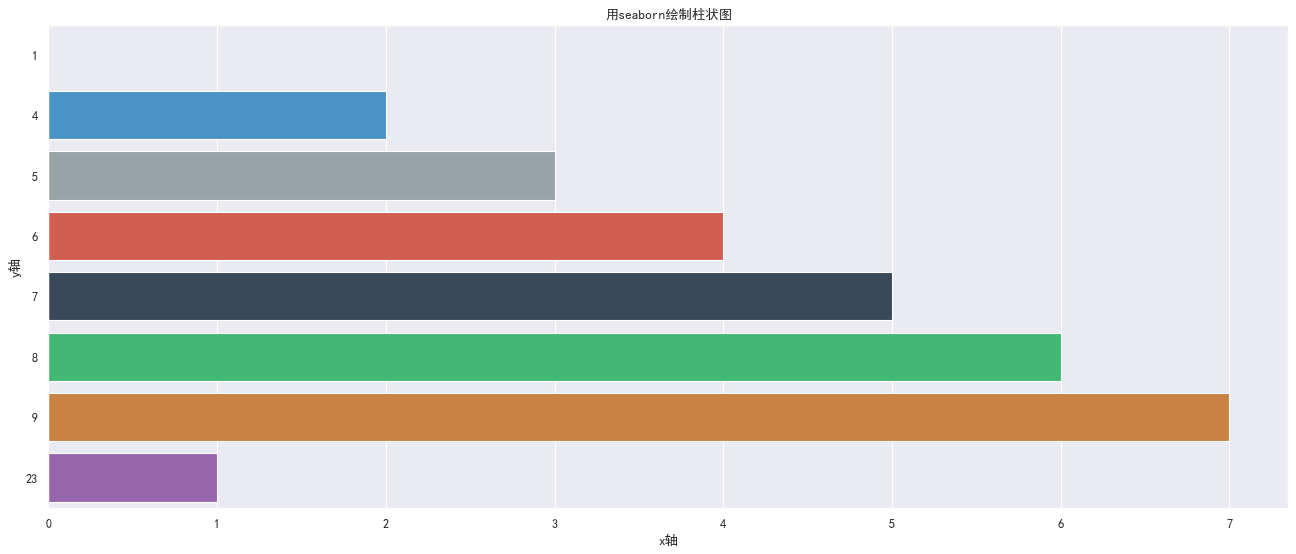

In [106]:
# palette = seaborn.color_palette(flatui)设置颜色
x = numpy.arange(8)
y = numpy.array([1,23,4,5,6,7,8,9])
matplotlib.pylab.figure(figsize=(20,8),dpi=80)
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71","#E1812C"]
pf = pandas.DataFrame({"x-axis":x,"y-axis":y})
seaborn.barplot(x=x,y=y,palette = seaborn.color_palette(flatui),orient="h")
matplotlib.pylab.xlabel("x轴")
matplotlib.pylab.ylabel("y轴")
matplotlib.pylab.title("用seaborn绘制柱状图")
matplotlib.pylab.show()

### 2、绘制散点图

In [ ]:
# seaborn.scatterplot()参数：
# x和y参数是数据
# size：用数据中某一列来通过大小区分类别
# hue：用数据中某一列来通过颜色区分类别
# style：用数据中某一列来通过形状区分类别
# palette:设置颜色
# hue_order：在使用hue参数对数据进行分组时，可以通过该参数设置数据组的显示顺序

In [35]:
ar=numpy.random.randn(20,4)
df=pandas.DataFrame(ar,columns=['a','b','c','d'])
df['e']=pandas.Series(['one','one','one','one','one','one','two','two','two','two','two','two','two','two','three','three','three','three','three','three'])

In [36]:
df.head()

,a,b,c,d,e
0,0.036634,0.014597,0.423303,-2.092537,one
1,-0.032764,3.341299,-0.688716,0.404602,one
2,0.251103,0.032010,-0.466350,0.247541,one
3,-0.164693,-0.514823,0.152730,-2.076366,one
4,1.051104,1.162167,1.158930,0.872591,one


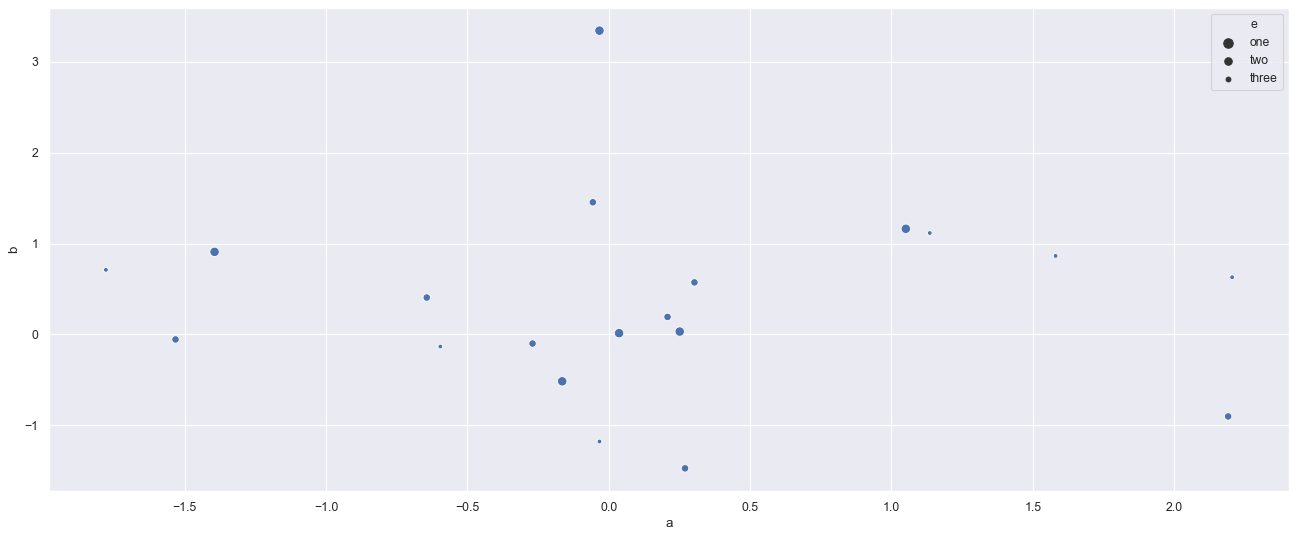

In [47]:
matplotlib.pylab.figure(figsize=(20,8),dpi=80)
seaborn.scatterplot(x=df['a'],y=df['b'],size=df["e"])
matplotlib.pylab.show()

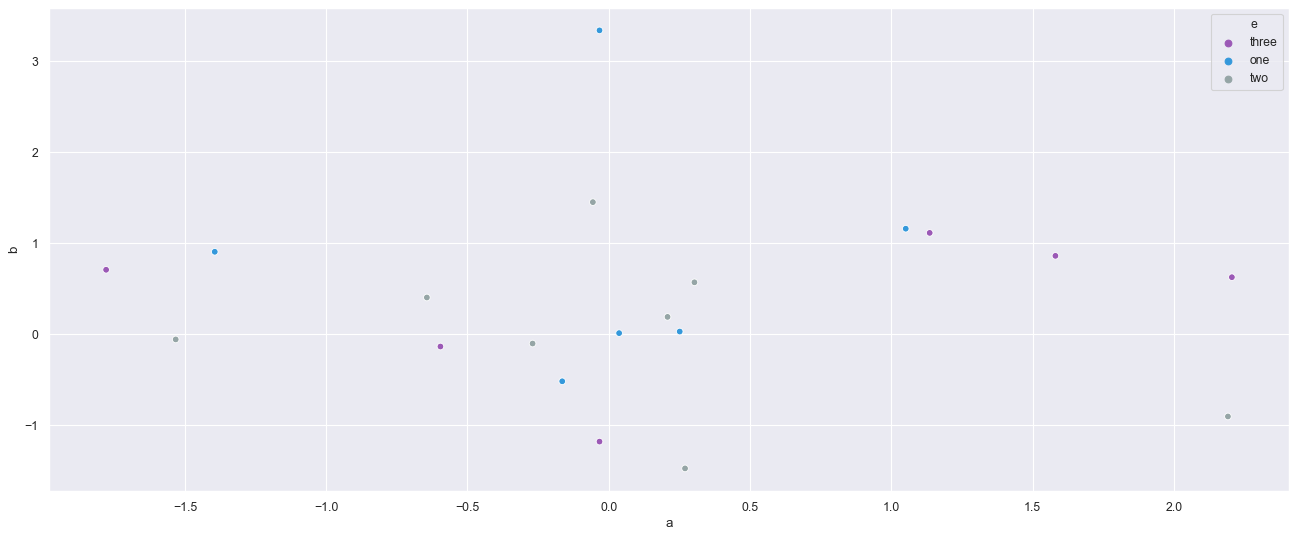

In [51]:
matplotlib.pylab.figure(figsize=(20,8),dpi=80)
flatui = ["#9b59b6", "#3498db", "#95a5a6"]
seaborn.scatterplot(df['a'],df['b'],hue=df['e'],palette=seaborn.color_palette(flatui),hue_order=['three','one','two'])
matplotlib.pylab.show()

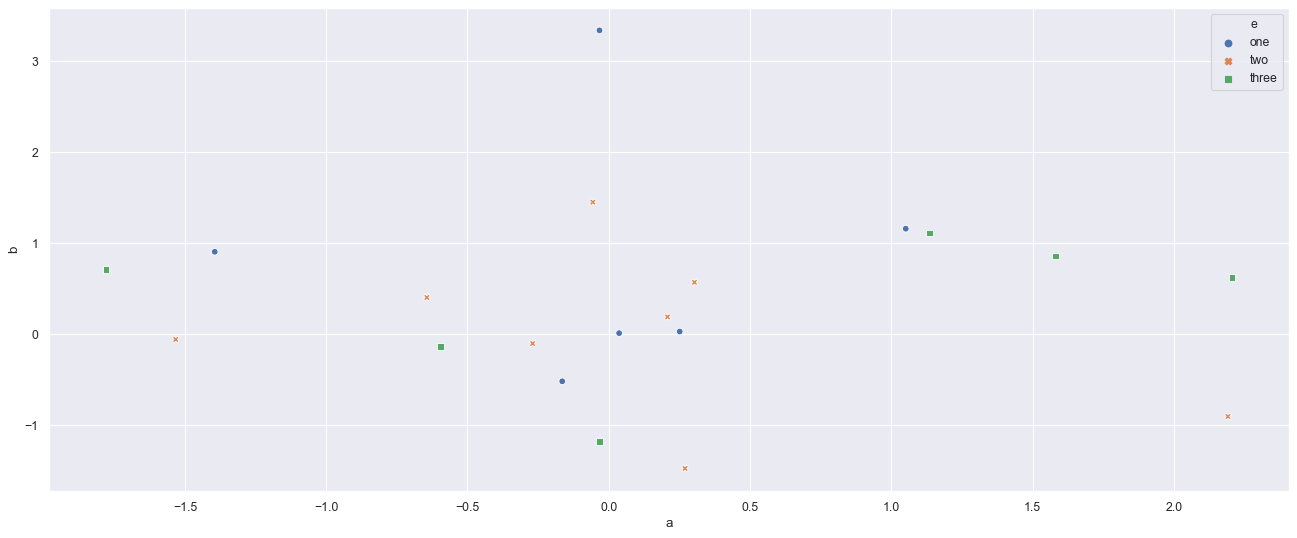

In [44]:
matplotlib.pylab.figure(figsize=(20,8),dpi=80)
seaborn.scatterplot(df['a'],df['b'],hue=df['e'],style=df["e"])
matplotlib.pylab.show()

### 3、绘制折线图

In [67]:
load_data = load_diabetes()
data = pandas.DataFrame(load_data.data,columns=load_data.feature_names)
df = data[:80]

In [69]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [70]:
def  fun(x):
    if x>0:
        return 1
    else:
        return 0

In [71]:
df["sex"] = df['sex'].apply(lambda x:fun(x))

D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [72]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,1,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,0,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,1,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,0,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,0,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


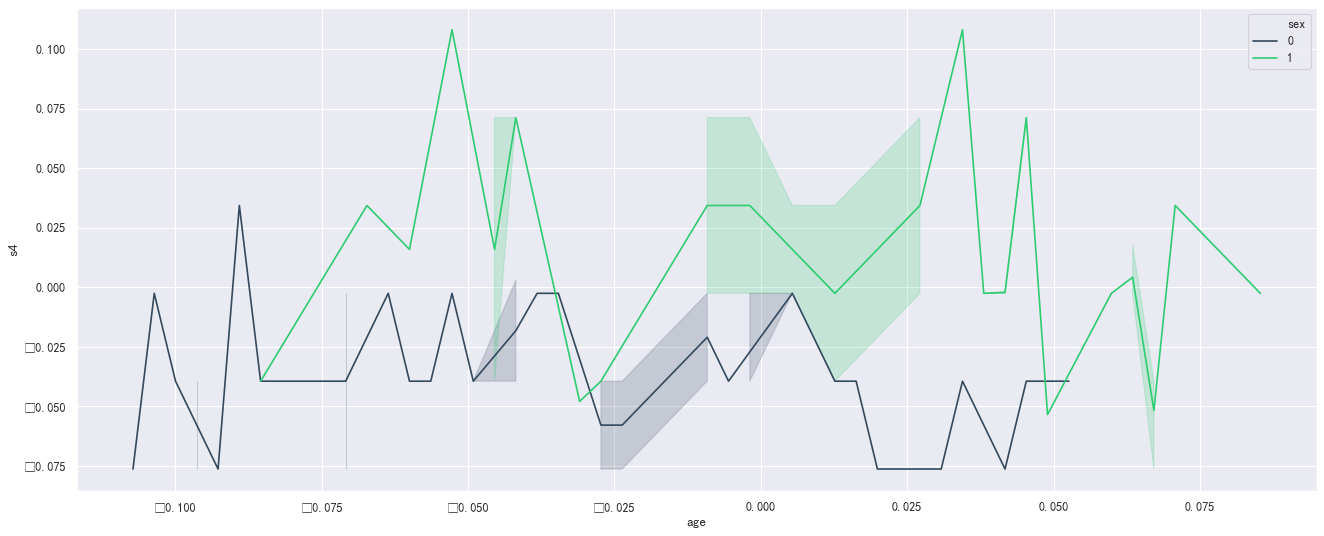

In [80]:
matplotlib.pylab.figure(figsize=(20,8),dpi=80)
color=["#34495e", "#2ecc71"]
seaborn.lineplot(x=df["age"],y=df["s4"],hue=df["sex"],palette=seaborn.color_palette(color))
matplotlib.pylab.show()

### 案例：对比每部电影票房的收入

In [99]:
movie_names = ['雷神3：诸神黄昏','正义联盟','东方快车谋杀案','寻梦环游记','全球风暴', '降魔传','追捕','七十七天','密战','狂兽','其它']
tickets = [73853,57767,22354,15969,14839,8725,8716,8318,7916,6764,52222]

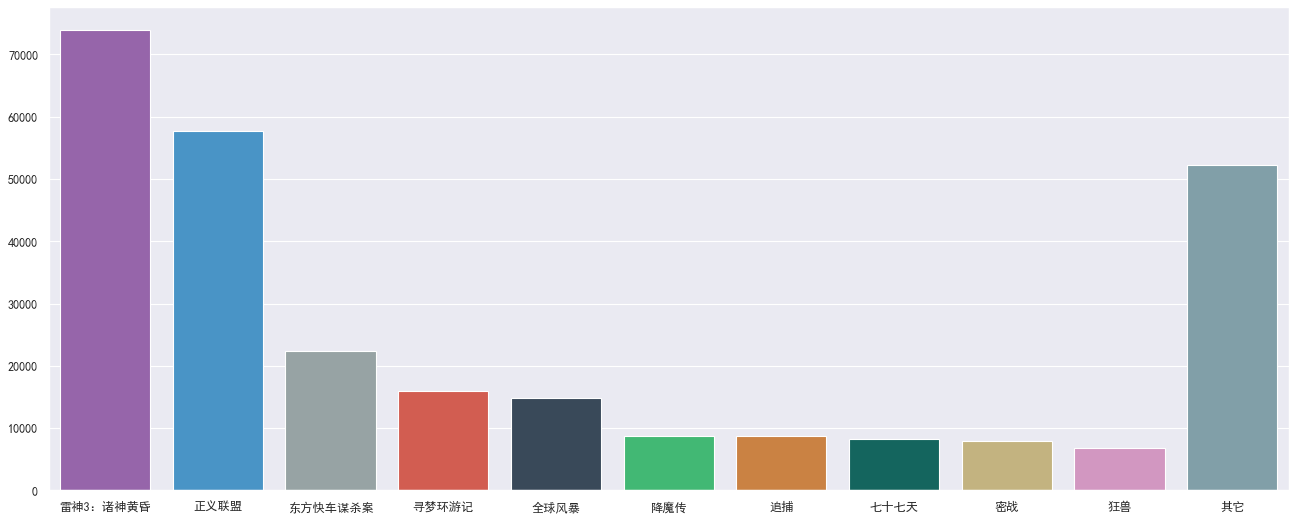

In [104]:
matplotlib.pylab.figure(figsize=(20,8),dpi=80)
color= ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71","#E1812C","#067269","#CEB975","#DC8DC5","#7AA2AF"]
clo = seaborn.color_palette(color)
seaborn.barplot(x=movie_names,y=tickets,palette=clo,orient='v')
# matplotlib.pylab.title("对比每部电影票房的收入")
# matplotlib.pylab.xlabel("电影名称")
# matplotlib.pylab.ylabel("票房数量")
matplotlib.pylab.show()